## Консультация по визуализации – ИАД-5

Полезные ссылки:
- [цвета](https://www.colorhexa.com/add8e6)
- [примеры](https://habr.com/ru/post/468295/)

#### Задание 1.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.kde import gaussian_kde

In [4]:
np.random.seed(123)
age = np.random.normal(50, 20, 150)
weight = np.random.uniform(50, 90, 150)
salary = age ** 2 + 3 * weight
features = [age, weight, salary]
names = ['age', 'weight', 'salary']

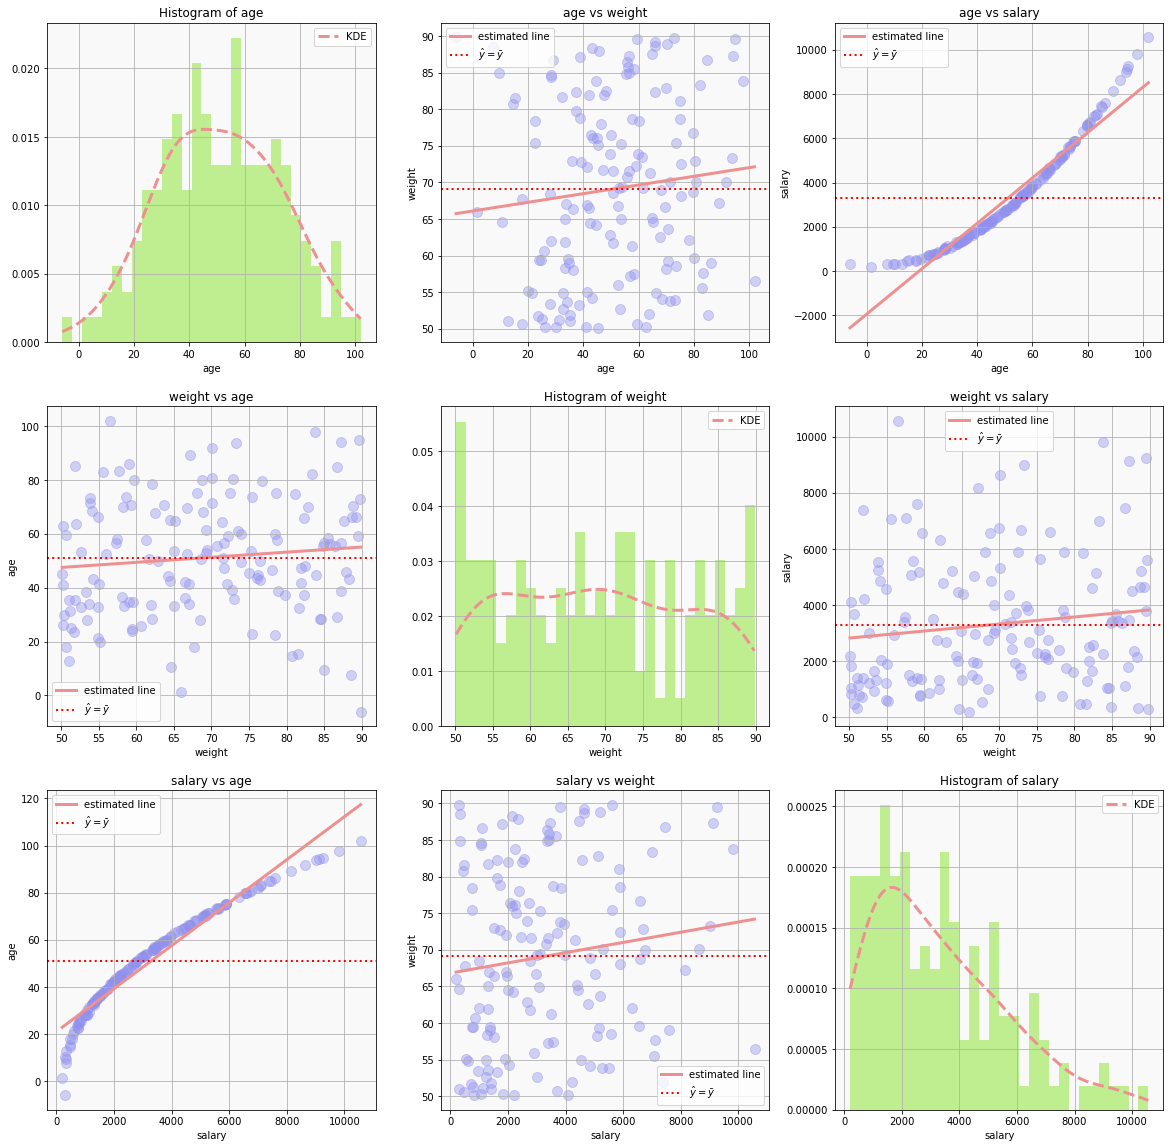

In [5]:
fig, ax = plt.subplots(3, 3, figsize = (20, 20))

for i in range(3):
    for j in range(3):
        if i == j:
            ax[i, j].hist(features[i], bins = 30, density = True, color = '#bfee90')
            ax[i, j].set_title('Histogram of ' + names[i])
            ax[i, j].set_xlabel(names[i])
            
            # Density estimation
            denisty = gaussian_kde(features[i])
            x = np.linspace(min(features[i]), max(features[i]), 150)
            ax[i, j].plot(x, denisty(x), color = '#ee9090', linestyle = '--', linewidth = 3, label = 'KDE')
            ax[i, j].legend()
            
        if i != j:
            ax[i, j].scatter(features[i], features[j], s = 100, alpha = 0.4, c = '#9090ee')
            ax[i, j].set_title(names[i] + ' vs ' + names[j])
            ax[i, j].set_xlabel(names[i])
            ax[i, j].set_ylabel(names[j])
            
            # y_hat = w_0 + w_1 X
            # w_1 = sum((y - mean(y))(x - mean(x))) / sum((x - mean(x)) ** 2)
            # mean(y) = w_0 + w_1mean(X)
            y_diff = features[j] - np.mean(features[j])
            x_diff = features[i] - np.mean(features[i])
            w_1 = np.sum(y_diff * x_diff) / np.sum(x_diff ** 2)
            w_0  = np.mean(features[j]) - w_1 * np.mean(features[i])
            x = np.linspace(min(features[i]), max(features[i]), 150)
            ax[i, j].plot(x, w_0 + w_1 * x, linewidth = 3, label = 'estimated line', c = '#ee9090')
            
            ax[i, j].axhline(np.mean(features[j]), c = 'r', linewidth = 2, linestyle = 'dotted', 
                             label = r'$\hat{y} = \bar{y}$') # raw string
            ax[i, j].legend()
        
        ax[i, j].set_facecolor('#f9f9f9')
        ax[i, j].grid('#adadad')

#### Задание 2.

In [6]:
data = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

In [8]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
sp = data.species.copy()
sp[sp == 'setosa'] = 0
sp[sp == 'versicolor'] = 1
sp[sp == 'virginica'] = 2

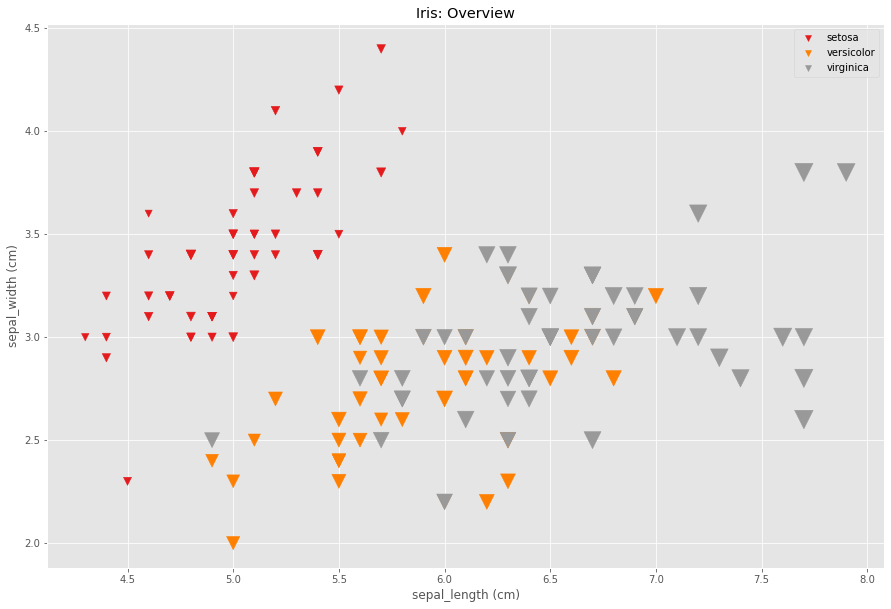

In [27]:
plt.style.use('ggplot')
plt.figure(figsize = (15, 10))
sc = plt.scatter(data['sepal_length'], data['sepal_width'], c = sp, marker = 'v', cmap = 'Set1', 
            s = 50 * data.petal_length)
plt.title('Iris: Overview')
plt.xlabel('sepal_length (cm)')
plt.ylabel('sepal_width (cm)')
plt.legend(handles = sc.legend_elements()[0], labels = ['setosa', 'versicolor', 'virginica'])

#### Задание 3

In [29]:
counts = [(sp == 0).sum(), (sp == 1).sum(), (sp == 2).sum()]

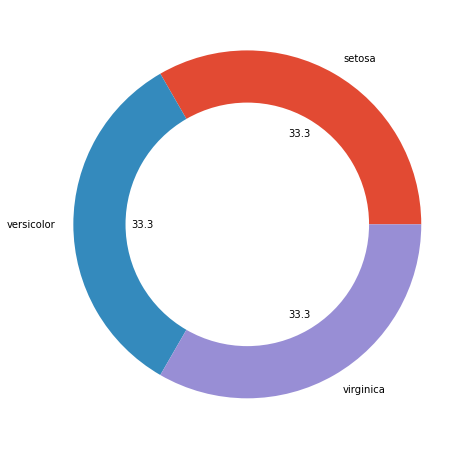

In [40]:
plt.figure(figsize = (10, 8))
_ = plt.pie(counts, labels = ['setosa', 'versicolor', 'virginica'], autopct = '%.1f', radius = 1,
           wedgeprops = {'width': 0.3})

#### Задание 4.

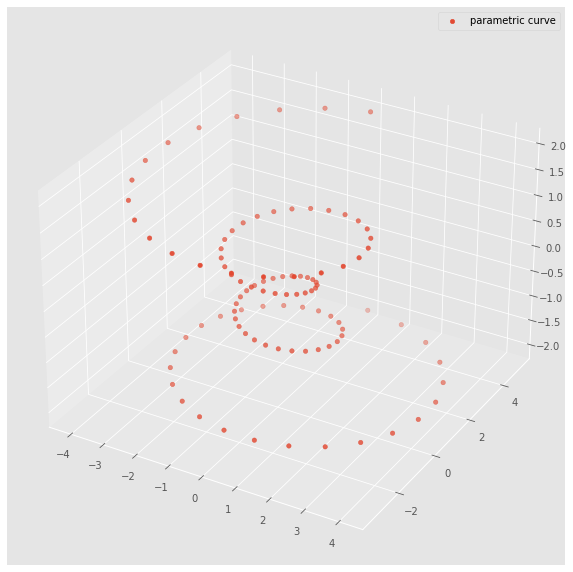

In [50]:
# https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10, 20))
ax = fig.gca(projection = '3d')

theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z ** 2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

ax.scatter(x, y, z, label = 'parametric curve')
ax.legend()

#### Задание 5.

In [69]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

#   y0        y1        y2 ...
#x0 (x0, y0)  (x0, y1) ...
#x1
#x2
#..

X, Y = np.meshgrid(x, y)
Z = np.exp(-np.cos(X) - np.sin(Y))
#Z = np.exp(-X ** 2 - Y ** 2)

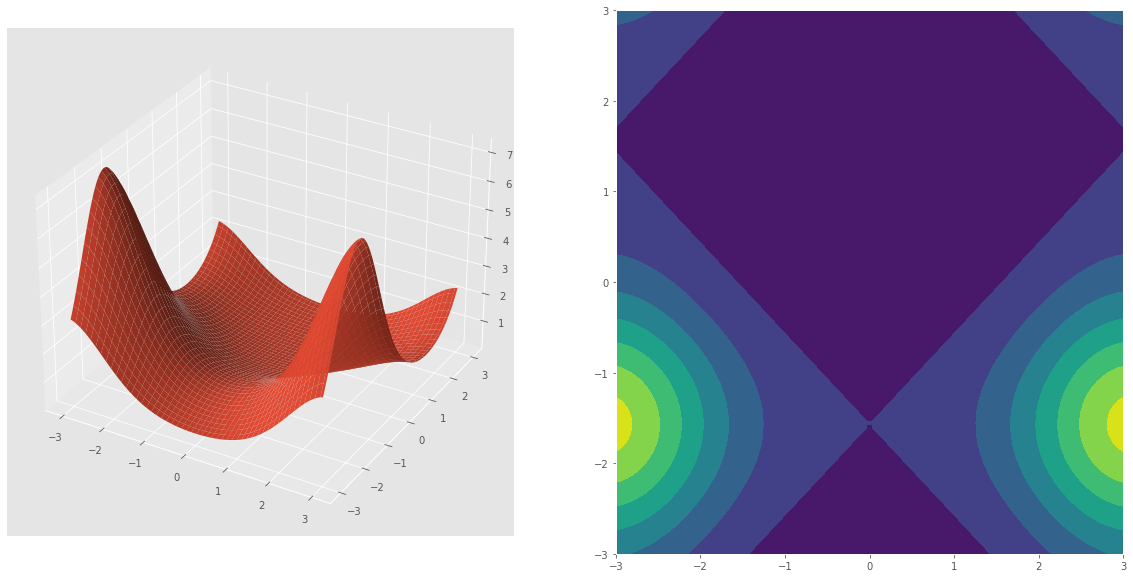

In [71]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1, 2, 1, projection = '3d')
surf = ax.plot_surface(X, Y, Z)
ax = fig.add_subplot(1, 2, 2)
ax.contourf(X, Y, Z)